In [4]:
import numpy as np
import subprocess
import os
import sys
import shutil
import matplotlib.pyplot as plt



In [1]:
def plot_scores(scores, n, name=None):
    nsc = np.array(scores)
    avg_scores = np.average(nsc, 0)
    movavg = np.convolve(avg_scores, np.ones(n), 'valid')/n
    plt.plot(movavg, label=name)

In [60]:
# How man runs it should average over.
NB_RUNS = 1

NB_EPISODES = 3000

dir_path = os.path.dirname(os.path.realpath(__vsc_ipynb_file__))
os.chdir(dir_path)
OPPONENT = "simpleai.json"
SELF = "cons.json"
FTEMP = "AVG_PERF_TEMP_AI_FILE.json"
COMMAND = "../target/release/connect4"

In [61]:
scores = []
for i in range(NB_RUNS):
    print(i)
    # So that the starting ai remains the same over all runs.
    shutil.copy(SELF, FTEMP)
    out = subprocess.check_output([COMMAND, "stack4", "train-against", FTEMP, OPPONENT, "--iterations", str(NB_EPISODES), '-s'])
    l = np.array(eval(out))
    scores.append(l)


0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


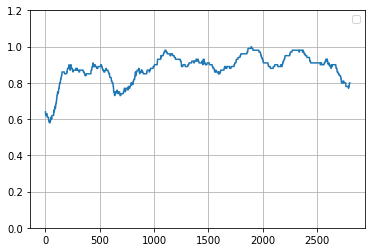

In [62]:
plot_scores(scores, 200)
plt.legend()
plt.ylim([0.0,1.2])
plt.grid()
plt.show()

In [12]:

# w_symmetries_score = scores
# %store w_symmetries_score


Stored 'w_symmetries_score' (list)
